In [1]:
from scipy.special import binom
import numpy as np
import matplotlib.pyplot as plt

# Smoothstep

In [2]:
def smoothstep(order, sample_density):
    n = order
    x = np.linspace(0, 1, sample_density)
    sum_array = np.zeros(x.shape)
    
    for k in range(n+1):
        sum_array += binom(n + k, k) * binom(2*n + 1, n - k) * (-x)**k
    
    S = x**(n+1) * sum_array
    return S

# Gradient, Sample, Distance, and Weight-Grids

In [3]:
# Create random gradient grid
nr_grid = 2
full_rot = np.radians(360)
grad_rots = np.random.uniform(0, full_rot, (nr_grid+1, nr_grid+1))
xs = np.cos(grad_rots)
ys = np.sin(grad_rots)
grad_grid = np.stack((xs, ys), axis=-1)

# Create sample grid
sample_density = 16
xs = np.linspace(0, 1, sample_density)
ys = xs
sample_grid = np.stack(np.meshgrid(xs, ys), axis=-1)

# Create distance vectors
corners = np.array(((0, 1), (1, 1), (0, 0), (1, 0)))
distance_grids = list()
for corner in corners:
    distance_vecs = sample_grid - corner
    distance_grids.append(distance_vecs)

# Visualize
## Gradient grid

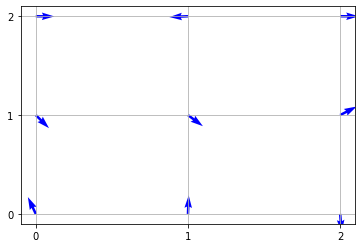

In [4]:
xs = np.arange(0, nr_grid + 1)
ys = np.arange(0, nr_grid + 1)
orig_xs, orig_ys = np.meshgrid(xs, ys)

grad_xs = grad_grid[:, :, 0].flatten()
grad_ys = grad_grid[:, :, 1].flatten()

plt.quiver(orig_xs.flatten(), 
           orig_ys.flatten(), 
           grad_xs, grad_ys, color='b')

axes = plt.gca()
axes.set_xticks(xs)
axes.set_yticks(ys)
plt.grid()

## Sample grid
Large squares have store random gradients in corners. 
Scatter dot represent pixels that are sampled. 

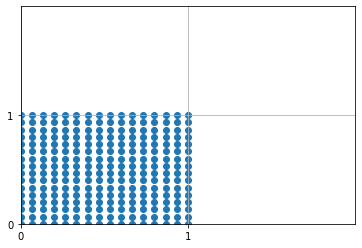

In [5]:
axes = plt.gca()
axes.set_xlim([0, 2])
axes.set_ylim([0, 2])

axes.set_xticks(np.arange(0, 2, 1))
axes.set_yticks(np.arange(0, 2, 1))

xs = sample_grid[:, :, 0].flatten()
ys = sample_grid[:, :, 1].flatten()

plt.scatter(xs,ys)
plt.grid()

# Distance vector grid 

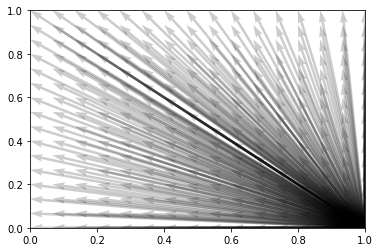

In [6]:
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])

xs = np.linspace(0, 1, sample_density)
orig_xs, orig_ys = np.meshgrid(xs, xs)

grad_xs = distance_vecs[:, :, 0].flatten()
grad_ys = distance_vecs[:, :, 1].flatten()

plt.quiver(corner[0], corner[1], grad_xs, grad_ys, angles='xy', scale_units='xy', scale=1, alpha=0.2)

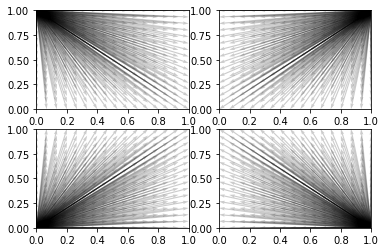

In [7]:
fig, axes = plt.subplots(2, 2)
axes = [item for sublist in axes for item in sublist]

for ax, dist, corner in zip(axes, distance_grids, corners):
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    axs = np.linspace(0, 1, 16)
    orig_xs, orig_ys = np.meshgrid(axs, axs)

    grad_xs = dist[:, :, 0].flatten()
    grad_ys = dist[:, :, 1].flatten()
    
    ax.quiver(corner[0], corner[1], grad_xs, grad_ys, angles='xy', scale_units='xy', scale=1, alpha=0.2)

# Perlin Noise Single Grid

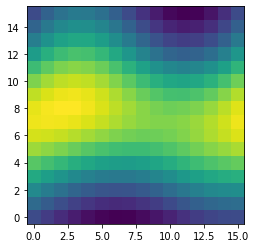

In [8]:
smooth_weight = smoothstep(2, sample_density)
x_weights, y_weights = np.meshgrid(smooth_weight, np.flip(smooth_weight))

dot_prods = list()
for idx, corner in enumerate(corners):
    x = corner[0]
    y = corner[1]
    grad = grad_grid[y, x]
    distance_grid = distance_grids[idx]
    dot_prod = np.tensordot(distance_grid, grad, axes=1)
    dot_prods.append(dot_prod)

A, B, C, D = dot_prods
AB = A + x_weights * (B - A)
CD = C + x_weights * (D - C)
pixels = AB + y_weights * (CD - AB)

plt.imshow(pixels, origin='lower')

# Perlin Noise multiple grids

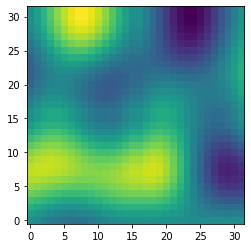

In [9]:
pixels = np.zeros((sample_density*nr_grid, sample_density*nr_grid))

for row in range(nr_grid):
    for col in range(nr_grid):
        
        dot_prods = list()
        for idx, corner in enumerate(corners):
            x = corner[0]
            y = corner[1]
            grad = grad_grid[y+row, x+col]
            distance_grid = distance_grids[idx]
            dot_prod = np.tensordot(distance_grid, grad, axes=1)
            dot_prods.append(dot_prod)

        A, B, C, D = dot_prods
        AB = A + x_weights * (B - A)
        CD = C + x_weights * (D - C)
        values = AB + y_weights * (CD - AB)
        
        pixels[row*sample_density : row*sample_density + sample_density, 
               col*sample_density : col*sample_density + sample_density] = values

plt.imshow(pixels, origin='lower')